# One-dimensional bound states from multiple Dirac-delta potentials
This project introduces a Python program designed to simulate a one-dimensional quantum system with an array of multiple Dirac delta potentials. The primary objective of this code is to explore bound states within this setup. Initially, the program generates the wavefunction across the system. Then, by implementing boundary conditions at the potential centers, a system of equations is created. Furthermore, the coefficient matrix determines the numerical values for the eigenenergies by finding the roots of the determinant for the k-values. Finally, by considering the normalization condition, all values for the coefficient expansion can be obtained. As we modify the code using Matplotlib, the program plots the wavefunction and its corresponding squared absolute value as a function of distance. In the final section, we consider the case where impurities are present in the system and analyze their effects on the system's behavior.


In [7]:
# import libraries here; add more as necessary
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import root,fsolve
from scipy.linalg import lu
from sympy import  Eq,lambdify, linear_eq_to_matrix, Matrix, det ,simplify,solve,integrate , expand ,symbols

# Wave functions 

In this section, a one-dimensional quantum system with multiple Dirac delta potentials is constructed. Users are given two options to choose between equal potentials or a system containing impurities. Initializing the system involves defining initial values like potential and distance. The user inputs the value of $\tilde{V_{0}}$, and  $d$. These options provide flexibility in defining the characteristics of the generated Dirac delta potentials. Once the preferred option is selected and the initial values, such as potentials and distances, are set, the code initiates by providing a list of general wave functions and their corresponding derivatives as functions of y where $y=kx$. This process can be observed in the following code:

In [10]:
# Creating an empty list to store potential values and distances. 
potentials_list=[]
distances_list=[]
potentials_list_s=[]
num_potentials=int(input("How many potentials does the system have? "))
potentials_type=input("The system can be constructed in two different forms.\n1. contains equal potential\n2. contains impurity\nPlease select an option (1 or 2): ")
# 2 option (equal potential, impurities)
if potentials_type=="1":
    potentials_value=float(input("Please enter the value for the potential: "))
    potentials_list.append(potentials_value)
    potentials_list=potentials_list*num_potentials
    print(potentials_list)
elif potentials_type=="2":
    for i in range(1,num_potentials+1):
        potentials_value=float(input(f"Please enter the value of potential number {i}: "))
        potentials_list.append(potentials_value)
    print(potentials_list)
else:
    print("your option is invalid please try again!")
# Initial value of distances for adjacent potentials 
distances_value=float(input("Please enter the value for the disctances between each potential: "))

distances_list.append(distances_value)
distances_list=distances_list*(num_potentials-1)
print(distances_list)
for i in potentials_list:
    pot_s=i/potentials_list[0]
    potentials_list_s.append(pot_s)
print(potentials_list_s)
# Creating two lists for generating coefficients expansion of wave function 
A=[sp.symbols("a_{}".format(i)) for i in range (1,num_potentials+2)]
B=[sp.symbols("b_{}".format(i)) for i in range (1,num_potentials+2)]
B[0]=0
A[num_potentials]=0

y = symbols('y', real=True)
k = symbols('k', positive=True)
# Symbolic notation for the wave function and corresponding derivatives 
psi_y=[A[i]*sp.exp((k/(potentials_list[0]))*y)+B[i]*sp.exp(-((k/(potentials_list[0]))*y)) for i in range(0,num_potentials+1)]

dpsi_y=[]
for i in range (len(psi_y)):
    derivative=sp.diff(psi_y[i],y)
    dpsi_y.append(derivative)
    
    

How many potentials does the system have?  4
The system can be constructed in two different forms.
1. contains equal potential
2. contains impurity
Please select an option (1 or 2):  1
Please enter the value for the potential:  1


[1.0, 1.0, 1.0, 1.0]


Please enter the value for the disctances between each potential:  1


[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]


# First and second Boundary conditions 
By adjusting the code and implementing the relevant boundary conditions, a system of equations will be generated.

In [13]:
# First boundary condition 
bc1_symbl=[]
counter1=0
for i in psi_y:
    difference1=psi_y[counter1+1]-psi_y[counter1]
    counter1+=1
    bc1_symbl.append(difference1)
    if counter1==len(psi_y)-1:
        break        
d_t=sp.symbols("d_t")
distances_symbl=[]
for i in range (len(distances_list)+1):
    distances_symbl.append(i*d_t)

distances_symbl_dval=[expr.subs(d_t,distances_value) for expr in distances_symbl] 
    
bc1_symbl_ydt=[expr.subs(y,val) for expr,val in zip(bc1_symbl,distances_symbl)]

bc1_symbl_dtval=[expr.subs(d_t,distances_value) for expr in bc1_symbl_ydt]

v_tilde=[]
for i in range(len(potentials_list)):
    if potentials_type=="1":
        v_t=sp.symbols("v_t")
        v_tilde.append(v_t)

    else:
        v_t=sp.symbols("v_t_{}".format(i+1))
        v_tilde.append(v_t)        

if potentials_type=="1":
    v_tilde_val=[expr.subs(v_t,potentials_list_s[0]) for expr in v_tilde]
elif potentials_type=="2":
    v_tilde_val=[expr.subs(dict(zip(v_tilde,potentials_list_s))) for expr in v_tilde]
    

#second boundary conditions   
bc2_symbl=[]
counter2=0
#(v_tilde[counter2]/k)*
for i in dpsi_y:
    if potentials_type=="1":
        difference2=dpsi_y[counter2+1]-dpsi_y[counter2]+(v_tilde[counter2]/v_tilde[0])*psi_y[counter2]
        counter2+=1
        bc2_symbl.append(difference2)
        if counter2==len(dpsi_y)-1:
            break
    elif potentials_type=="2":
        difference2=dpsi_y[counter2+1]-dpsi_y[counter2]+(v_tilde[counter2]/v_tilde[0])*psi_y[counter2]
        counter2+=1
        bc2_symbl.append(difference2)
        if counter2==len(dpsi_y)-1:
            break
            
            
bc2_symbl_ydt=[expr.subs(y,val) for expr,val in zip(bc2_symbl,distances_symbl)]
bc2_symbl_dtval=[expr.subs(d_t,distances_value)for expr in bc2_symbl_ydt]


if potentials_type=="1":
    bc2_symbl_vval=[expr.subs(v_t,v_tilde_val[0]) for expr in bc2_symbl_dtval]
elif potentials_type=="2":
    bc2_symbl_vval=[expr.subs(dict(zip(v_tilde,v_tilde_val))) for expr in bc2_symbl_dtval ]

# Creating a system of equations     
system_eq=[Eq(eq,0) for eq in bc1_symbl_dtval+bc2_symbl_vval] 

# Eigenenergies and Bound states
Additionally, by altering the code, the system of equations can be expressed as a matrix. The eigenenergies can then be determined by finding the roots of the determinant for the value of k. Furthermore, by applying the normalization condition, all the coefficient expansions in the wave function can be determined.

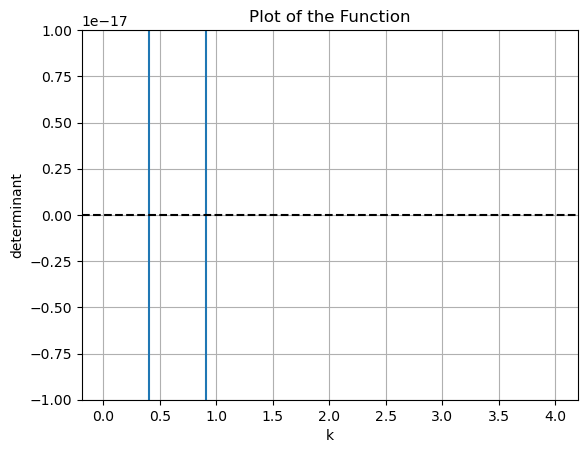

Enter the number of ranges of guesses:  2



Range 1:


Enter initial guesses separated by spaces:  0.4 0.5 


Roots found by each method:
hybr: Root = 0.40224226295764887, f(root) = -1.1730384431906665e-13
lm: Root = 0.4022422629573927, f(root) = -7.225590213363874e-18
broyden1: Root = 0.40224401028882023, f(root) = -8.002569537955978e-07
broyden2: Root = 0.4022440060403845, f(root) = -7.983112053369819e-07
krylov: Root = 0.40224226295502064, f(root) = 1.086371101356283e-12

Range 2:


Enter initial guesses separated by spaces:  0.8 1 


Roots found by each method:
hybr: No roots found within the range of guesses.
lm: Root = 0.9110167899451271, f(root) = -8.394394454598251e-17
broyden1: No roots found within the range of guesses.
broyden2: No roots found within the range of guesses.
krylov: Root = 0.9110167899719628, f(root) = 9.817051247313541e-11


Enter the value of k1:  0.4022422629573927
Enter the value of k2:  0.9110167899451271


In [16]:
vectorA = A[:-1]
vectorB = B[1:]

vector=vectorA+vectorB
# Convert to matrix form
D, z = sp.linear_eq_to_matrix(system_eq, vector)
# LU decomposition 
L, U, _ = D.LUdecomposition()

determinant = U.det()
determinant_func=sp.lambdify(k,determinant, "numpy")

k_vals=np.linspace(0.01,4,500)
plt.plot(k_vals, determinant_func(k_vals))
plt.xlabel('k')
plt.ylabel('determinant')
plt.ylim(-0.00000000000000001,0.00000000000000001)
plt.title('Plot of the Function')
plt.axhline(0, color='black', linestyle='--')  # Add x-axis
plt.grid(True)
plt.show()

# Number of initial guesses for the determinant's root
num_ranges = int(input("Enter the number of ranges of guesses: "))

# 5 Method for finding the root of the determinant for k value 
for i in range(num_ranges):
    print(f"\nRange {i+1}:")
    # Input initial guesses for the current range
    initial_guesses = input("Enter initial guesses separated by spaces: ").split()
    initial_guesses = [float(guess) for guess in initial_guesses]
    
    roots_found = {method: None for method in ['hybr', 'lm', 'broyden1', 'broyden2', 'krylov']}


    for method in roots_found.keys():
        sol = root(determinant_func, initial_guesses, method=method)
        if sol.success:
            root_value = sol.x[0]
            if min(initial_guesses) < root_value < max(initial_guesses):
                roots_found[method] = root_value

    print("Roots found by each method:")
    for method, root_value in roots_found.items():
        if root_value is not None:
            print(f"{method}: Root = {root_value}, f(root) = {determinant_func(root_value)}")
        else:
            print(f"{method}: No roots found within the range of guesses.")
# storing k values in an empty list 
k_numeric=[]
for i in range (num_ranges):
        k_value=float(input("Enter the value of k{}: ".format(i+1)))
        k_numeric.append(k_value)

bc1_z=[sp.Eq(eq,0) for eq in bc1_symbl_dtval]
bc2_z=[sp.Eq(eq,0) for eq in bc2_symbl_vval] 


subtracted_eq = Eq(bc1_z[0].lhs + bc2_z[0].lhs, 0)

# Solve for b2 in terms of a2
b2_in_terms_of_a2 = solve(subtracted_eq, B[1])[0]

# Substitute b2 in terms of a2 into the first equation of list 1
substituted_eq = bc1_z[0].subs(B[1], b2_in_terms_of_a2)

# Solve for a2 in terms of a1
a2_in_terms_of_a1 = solve(substituted_eq, A[1])[0]
b2_in_terms_of_a1 = solve(bc2_z[0].subs(A[1], a2_in_terms_of_a1), B[1])[0]


syseq = [[bc1_z[i], bc2_z[i]] for i in range(len(bc1_z))]
syseq = syseq[1:-1] 

solutions = {A[1]: a2_in_terms_of_a1, B[1]: b2_in_terms_of_a1}

syseqvar = [(A[i], B[i]) for i in range(2, num_potentials)]

all_solutionsys = []

for i, sys in enumerate(syseq):
    solsys = solve(sys, *syseqvar[i])  
    all_solutionsys.append(solsys)
    for j in range(i+1, len(syseq)):
        syseq[j] = [eq.subs(solsys) for eq in syseq[j]] 

# finding all coefficient expansion in terms of a1 
all_solutionsys_a1 = [{var: val.subs({A[1]: a2_in_terms_of_a1, B[1]: b2_in_terms_of_a1}) for var, val in solsys.items()} for solsys in all_solutionsys]


A_new = []
B_new = []

for d in all_solutionsys_a1:
    for key, value in d.items():
        if key in A:
            A_new.append(value)
        elif key in B:
            B_new.append(value)


A_new.append(0)
B_new.insert(0,0)
A_new.insert(0,a2_in_terms_of_a1 )
B_new.insert(1,b2_in_terms_of_a1)
B_new.append(B[num_potentials])
A_new.insert(0,A[0] )

B_l = sp.solve(bc1_z[num_potentials-1], B[num_potentials])

# Create substitution list
subB_l = [(A[num_potentials-1], A_new[num_potentials-1]), (B[num_potentials-1], B_new[num_potentials-1])]

# Perform the substitution on the solution
subB_leq = [sol.subs(subB_l) for sol in B_l]
B_new[num_potentials]=subB_leq[0]
A_a1=A_new
B_a1=B_new



psi_y = [A[i] * sp.exp((k/(potentials_list[0]))*y) + B[i] * sp.exp(-(k/(potentials_list[0]))*y) for i in range(num_potentials + 1)]

square_psi_y=[(expr)**2 for expr in psi_y]

distances_symbl.append(sp.oo)

distances_symbl.insert(0,-sp.oo)


totdistances=distances_symbl[1:-1]

intbounds = [[totdistances[i], totdistances[i+1]] for i in range(len(totdistances)-1)]


integralsummation = 0

# Integrate each function over its corresponding boundaries 
for func, bounds in zip(square_psi_y, intbounds):
    lbound, ubound = bounds
    intvalue = integrate(func, (y, lbound, ubound))
    integralsummation += intvalue

intsubs = {a: val for a, val in zip(A, A_a1)}
intsubs.update({b: val for b, val in zip(B, B_a1)})

# Perform substitution
int_a1 = integralsummation.subs(intsubs)

# Applying normalization condition 
normalization = [Eq(int_a1, 1)]

normalization_dval=[expr.subs(d_t,distances_list[0]) for expr in normalization]

normalization_dval=normalization_dval*len(k_numeric)

normalization_kval=[expr.subs(k,val)for expr,val in zip(normalization_dval,k_numeric) ]


a1_coefficient=[]
for i in normalization_kval:
    a_1=solve(i,A_a1[0])
    a1_coefficient.append(a_1)
    
psi_y_a1= [A_a1[i] * sp.exp((k/(potentials_list[0]))*y) + B_a1[i] * sp.exp(-(k/(potentials_list[0]))*y) for i in range(num_potentials + 1)]



psi_y_a1_kval = []

for k_value in k_numeric:
    psi_y_a1_k = [expr.subs(k, k_value) for expr in psi_y_a1]
    psi_y_a1_kval.append(psi_y_a1_k)






subtracted_eq = Eq(bc1_z[0].lhs - bc2_z[0].lhs, 0)

# Solve for b2 in terms of a2
b2_in_terms_of_a2 = solve(subtracted_eq, B[1])[0]

# Substitute b2 in terms of a2 into the first equation of list 1
substituted_eq = bc1_z[0].subs(B[1], b2_in_terms_of_a2)

# Solve for a2 in terms of a1
a2_in_terms_of_a1 = solve(substituted_eq, A[1])[0]
b2_in_terms_of_a1 = solve(bc2_z[0].subs(A[1], a2_in_terms_of_a1), B[1])[0]


syseq = [[bc1_z[i], bc2_z[i]] for i in range(len(bc1_z))]
syseq = syseq[1:-1] 

solutions = {A[1]: a2_in_terms_of_a1, B[1]: b2_in_terms_of_a1}

syseqvar = [(A[i], B[i]) for i in range(2, num_potentials)]

all_solutionsys = []

for i, sys in enumerate(syseq):
    solsys = solve(sys, *syseqvar[i])  
    all_solutionsys.append(solsys)
    for j in range(i+1, len(syseq)):
        syseq[j] = [eq.subs(solsys) for eq in syseq[j]] 

# finding all coefficient expansion in terms of a1 
all_solutionsys_a1 = [{var: val.subs({A[1]: a2_in_terms_of_a1, B[1]: b2_in_terms_of_a1}) for var, val in solsys.items()} for solsys in all_solutionsys]


A_new = []
B_new = []

for d in all_solutionsys_a1:
    for key, value in d.items():
        if key in A:
            A_new.append(value)
        elif key in B:
            B_new.append(value)


A_new.append(0)
B_new.insert(0,0)
A_new.insert(0,a2_in_terms_of_a1 )
B_new.insert(1,b2_in_terms_of_a1)
B_new.append(B[num_potentials])
A_new.insert(0,A[0] )

B_l = sp.solve(bc1_z[num_potentials-1], B[num_potentials])

# Create substitution list
subB_l = [(A[num_potentials-1], A_new[num_potentials-1]), (B[num_potentials-1], B_new[num_potentials-1])]

# Perform the substitution on the solution
subB_leq = [sol.subs(subB_l) for sol in B_l]
B_new[num_potentials]=subB_leq[0]
A_a1=A_new
B_a1=B_new



psi_y = [A[i] * sp.exp((k/(potentials_list[0]))*y) + B[i] * sp.exp(-(k/(potentials_list[0]))*y) for i in range(num_potentials + 1)]

square_psi_y=[(expr)**2 for expr in psi_y]

distances_symbl.append(sp.oo)

distances_symbl.insert(0,-sp.oo)


totdistances=distances_symbl[1:-1]

intbounds = [[totdistances[i], totdistances[i+1]] for i in range(len(totdistances)-1)]


integralsummation = 0

# Integrate each function over its corresponding boundaries 
for func, bounds in zip(square_psi_y, intbounds):
    lbound, ubound = bounds
    intvalue = integrate(func, (y, lbound, ubound))
    integralsummation += intvalue

intsubs = {a: val for a, val in zip(A, A_a1)}
intsubs.update({b: val for b, val in zip(B, B_a1)})

# Perform substitution
int_a1 = integralsummation.subs(intsubs)

# Applying normalization condition 
normalization = [Eq(int_a1, 1)]

normalization_dval=[expr.subs(d_t,distances_list[0]) for expr in normalization]

normalization_dval=normalization_dval*len(k_numeric)

normalization_kval=[expr.subs(k,val)for expr,val in zip(normalization_dval,k_numeric) ]


a1_coefficient=[]
for i in normalization_kval:
    a_1=solve(i,A_a1[0])
    a1_coefficient.append(a_1)
    
psi_y_a1= [A_a1[i] * sp.exp((k/(potentials_list[0]))*y) + B_a1[i] * sp.exp(-(k/(potentials_list[0]))*y) for i in range(num_potentials + 1)]



psi_y_a1_kval = []

for k_value in k_numeric:
    psi_y_a1_k = [expr.subs(k, k_value) for expr in psi_y_a1]
    psi_y_a1_kval.append(psi_y_a1_k)

# Graphical representation
Using Matplotlib, the wave function and its corresponding squared absolute value will be plotted as a function of distance, providing insight into how the quantum-confined particle behaves in such a system.

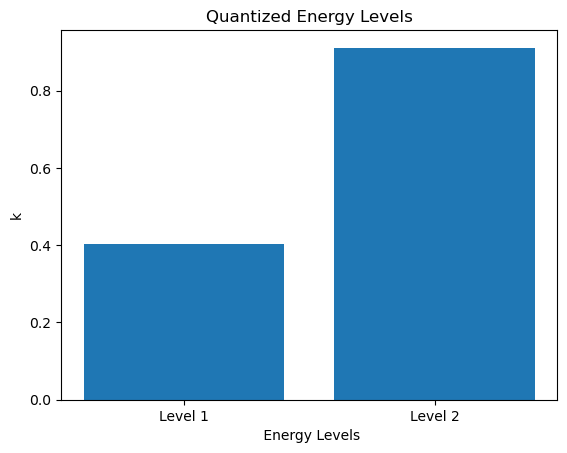

In [17]:
psi_y_odd = []

psi_y_even=[]

for  (val1, val2), exprs in zip(a1_coefficient, psi_y_a1_kval):
    wave_function_odd = [expr.subs(A[0], val1) for expr in exprs]
    wave_function_even = [expr.subs(A[0], val2) for expr in exprs]
    psi_y_odd.append(wave_function_odd)
    psi_y_even.append(wave_function_even)

square_psi_y_even=[]
for sublist in psi_y_even:
    squared_sublist1=[(expr)**2 for expr in sublist]
    square_psi_y_even.append(squared_sublist1)
square_psi_y_odd=[]
for sublist in psi_y_odd:
    squared_sublist2=[(expr)**2 for expr in sublist]
    square_psi_y_odd.append(squared_sublist2)
    
def graph_range(num_potentials):
    graph_ranges = [[-20, 0]]
    for i in range(1, num_potentials+1):
        graph_ranges.append([(i-1) * distances_value, i * distances_value])
    graph_ranges.append([num_potentials * distances_value, 30])
    return graph_ranges


psi_y_ranges=graph_range(num_potentials-1)

def plot_psi(psi, psi_y_ranges):
    plt.figure()
    for expr, r in zip(psi, psi_y_ranges):
        f = sp.lambdify(y, expr, 'numpy')
        
        # Plot for the specific range
        y_vals = np.linspace(r[0], r[1], 400)
        psi_vals = f(y_vals)
        plt.plot(y_vals, psi_vals)

    plt.xlabel('y')
    plt.ylabel(r'$\psi(y)$')
    plt.title(r"plot of the Wave Functions")
    plt.grid(True)

#for i, psi in enumerate(psi_y_odd):
    #plot_psi(psi, psi_y_ranges)
for i, psi in enumerate(psi_y_even):
    plot_psi(psi, psi_y_ranges)
    plt.savefig(f"wavefunction for k_{i}")
    plt.close()


def plot_psi_square(psi_square, psi_y_ranges):
    plt.figure()
    for expr, r in zip(psi_square, psi_y_ranges):
        f = sp.lambdify(y, expr, 'numpy')
        y_vals = np.linspace(r[0], r[1], 400)
        psi_square_vals = f(y_vals)
        plt.plot(y_vals, psi_square_vals)

    plt.xlabel('y')
    plt.ylabel(r"$\mid \Psi(y) \mid^2$")
    plt.title("plot of the Wave Function's absolute Value Squared")
    plt.grid(True)

# Generate the plots 
#for i, psi_square in enumerate(square_psi_y_odd):
    #plot_psi_square(psi_square, psi_y_ranges)
for i, psi_square in enumerate(square_psi_y_even):
    plot_psi_square(psi_square, psi_y_ranges)
    plt.savefig(f"wavefunction square for k_{i}")
    plt.close()
    

plt.show()
# Generating energy level 
energy_levels = [f'Level {i+1}' for i in range(len(k_numeric))]

# Create the bar plot
plt.bar(energy_levels, k_numeric)

# Labels and title 
plt.xlabel(' Energy Levels')
plt.ylabel('k')
plt.title('Quantized Energy Levels')

# Show the plot
plt.show()